# <span style="color:blue">Import Packages</span>

In [2]:
# for numerical analysis
import numpy as np # linear algebra

# to store and process in a dataframe
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualizations, for ploting graphs
import matplotlib.pyplot as plt

# image processing
import matplotlib.image as mpimg

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# advanced ploting
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Image manipulations
from PIL import Image

# Timing utility
from timeit import default_timer as timer

from IPython.core.interactiveshell import InteractiveShell

# Printing out all outputs
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
# PyTorch
import torchvision
from torchvision import transforms, datasets, models

import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d
from torch.nn import Module, Softmax, BatchNorm2d, Dropout

import gc

In [5]:
# file operations

import shutil
import os
from os import walk

# to list files
import glob

print(os.listdir("../input"))

['ecg-images']


In [6]:
# current working directory
os.getcwd()

'/kaggle/working'

* F (Fusion beat) - 801 images
* N (Normal beat) - 90,589 images
* Q (Unknown beat) - 8,038 images
* S (Supraventricular ectopic beat) - 2,779 images
* V (Ventricular ectopic beat) - 7,236 images

# <span style="color:blue">Check Files in the MITBIH_img Folder</span>

In [7]:
# no. of files

def list_files(startpath):
    
    for root, dirs, files in os.walk(startpath):
        
        level = root.replace(startpath, '').count(os.sep)
        
        indent = ' ' * 4 * (level)
        
        print('{}{}'.format(indent, os.path.basename(root)), '-', len(os.listdir(root)))
        
folder = '/kaggle/input'
list_files(folder)

input - 1
    ecg-images - 1
        MITBIH_img - 5
            N - 90589
            F - 803
            Q - 8038
            V - 7236
            S - 2779


In [8]:
folder = '/kaggle/working'
list_files(folder)

working - 1


In [9]:
# list of files in the dataset /input/ecg-images/MITBIH_img

os.listdir('../input/ecg-images/MITBIH_img')

['N', 'F', 'Q', 'V', 'S']

In [10]:
# Classes in the data

ECG_list = os.listdir('../input/ecg-images/MITBIH_img')

n_classes = len(ECG_list)

print(f'There are {n_classes} different classes.')

There are 5 different classes.


In [11]:
ECG_list

['N', 'F', 'Q', 'V', 'S']

In [12]:
classes = ('S', 'V', 'Q', 'N', 'F')

# <span style="color:blue">Count Number of Files in the MITBIH_img Folder</span>

In [13]:
N_imgs = os.listdir('../input/ecg-images/MITBIH_img/N')
print('# of Normal beats: ',len(N_imgs))

F_imgs = os.listdir('../input/ecg-images/MITBIH_img/F')
print('# of Fusion beats: ',len(F_imgs))

Q_imgs = os.listdir('../input/ecg-images/MITBIH_img/Q')
print('# of Unknown beats: ',len(Q_imgs))

V_imgs = os.listdir('../input/ecg-images/MITBIH_img/V')
print('# of Ventricular ectopic beats: ',len(V_imgs))

S_imgs = os.listdir('../input/ecg-images/MITBIH_img/S')
print('# of Supraventricular ectopic beats: ',len(S_imgs))

# of Normal beats:  90589
# of Fusion beats:  803
# of Unknown beats:  8038
# of Ventricular ectopic beats:  7236
# of Supraventricular ectopic beats:  2779


In [14]:
#print(N_dir)
print(N_imgs[0])

fig_39533.png


# <span style="color:blue">EDA</span>

In [15]:
def imshow(image):
    """Display image"""
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

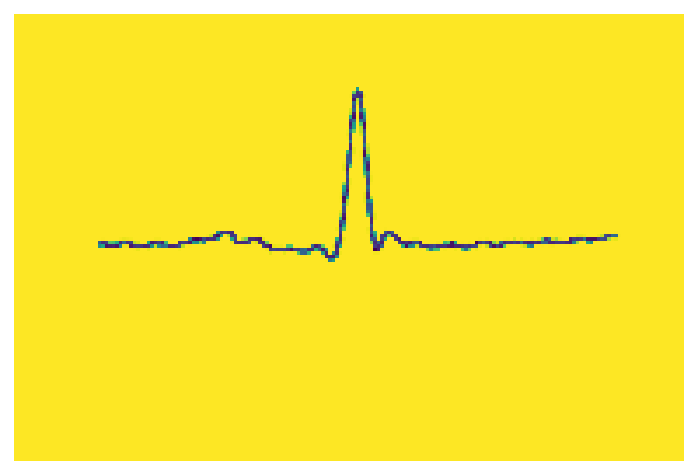

In [16]:
image = mpimg.imread(os.path.join('../input/ecg-images/MITBIH_img/N', N_imgs[0]))

imshow(image)

In [17]:
print(image.shape)
print(type(image))

(128, 192)
<class 'numpy.ndarray'>


# <span style="color:blue">Show Images From Each Folder</span>

In [18]:
# Define a function which will plot several images

def image_shows(folder, number_of_images):
    
    n=number_of_images;
    
    folder_list = os.listdir(folder)
    
    fig, axes = plt.subplots(nrows = 1, ncols=n, figsize=(20, 10))
    
    for i in range(n):
        
        print(os.path.join(folder, folder_list[i]))
        
        image = mpimg.imread(os.path.join(folder, folder_list[i]));
        
        axes[i].imshow(image);

../input/ecg-images/MITBIH_img/N/fig_39533.png
../input/ecg-images/MITBIH_img/N/fig_7834.png
../input/ecg-images/MITBIH_img/N/fig_51013.png
../input/ecg-images/MITBIH_img/N/fig_46732.png
../input/ecg-images/MITBIH_img/N/fig_4499.png
../input/ecg-images/MITBIH_img/N/fig_49211.png


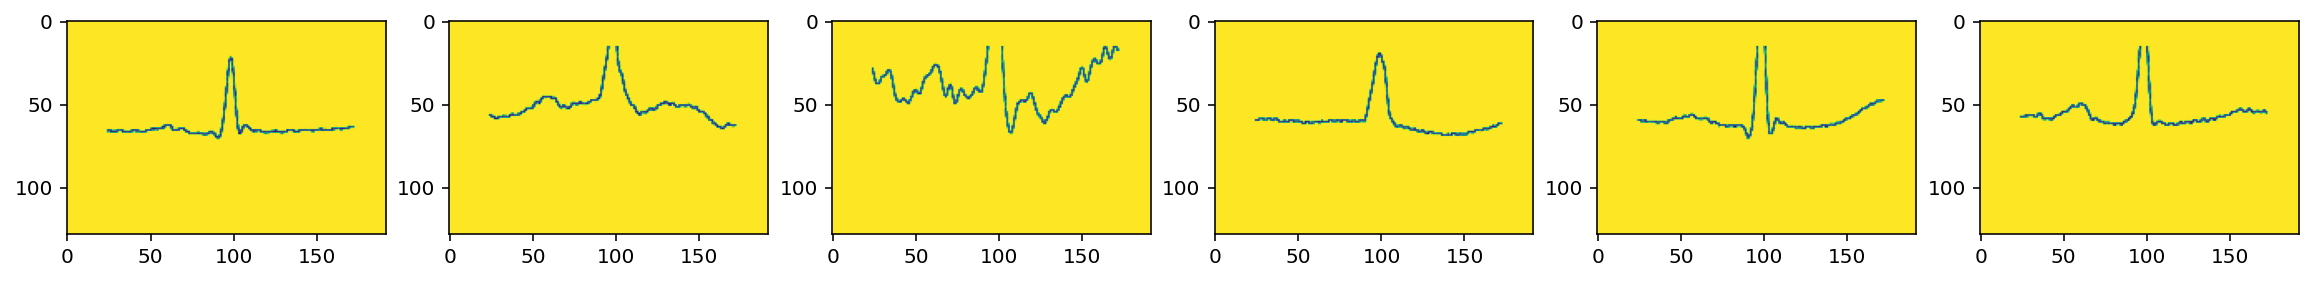

In [19]:
# Examples of N

image_shows(folder = '../input/ecg-images/MITBIH_img/N', number_of_images = 6)

../input/ecg-images/MITBIH_img/S/Afig_2428.png
../input/ecg-images/MITBIH_img/S/Jfig_31200049.png
../input/ecg-images/MITBIH_img/S/Afig_374.png
../input/ecg-images/MITBIH_img/S/Afig_20.png
../input/ecg-images/MITBIH_img/S/Afig_1618.png
../input/ecg-images/MITBIH_img/S/Afig_2029.png


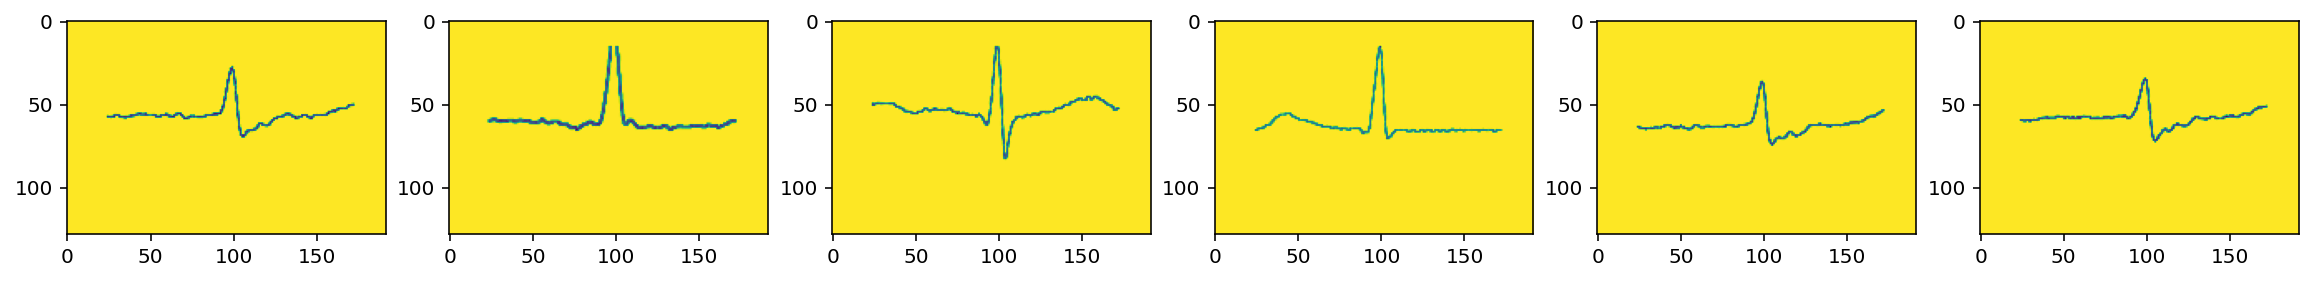

In [20]:
# Examples of S

image_shows(folder = '../input/ecg-images/MITBIH_img/S', number_of_images = 6)

../input/ecg-images/MITBIH_img/Q/pfig_31206421.png
../input/ecg-images/MITBIH_img/Q/pfig_31205666.png
../input/ecg-images/MITBIH_img/Q/pfig_31205432.png
../input/ecg-images/MITBIH_img/Q/pfig_31202565.png
../input/ecg-images/MITBIH_img/Q/pfig_31204677.png
../input/ecg-images/MITBIH_img/Q/pfig_31206711.png


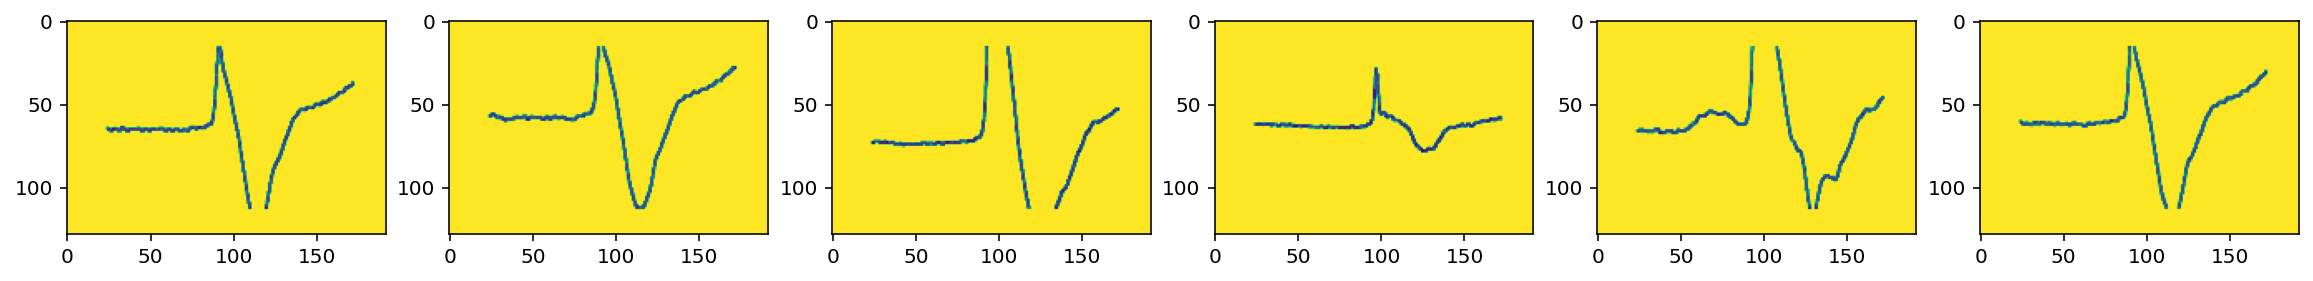

In [21]:
# Examples of Q

image_shows(folder = '../input/ecg-images/MITBIH_img/Q', number_of_images = 6)

../input/ecg-images/MITBIH_img/V/fig_4499.png
../input/ecg-images/MITBIH_img/V/fig_4264.png
../input/ecg-images/MITBIH_img/V/fig_4880.png
../input/ecg-images/MITBIH_img/V/fig_5494.png
../input/ecg-images/MITBIH_img/V/fig_4047.png
../input/ecg-images/MITBIH_img/V/fig_4440.png


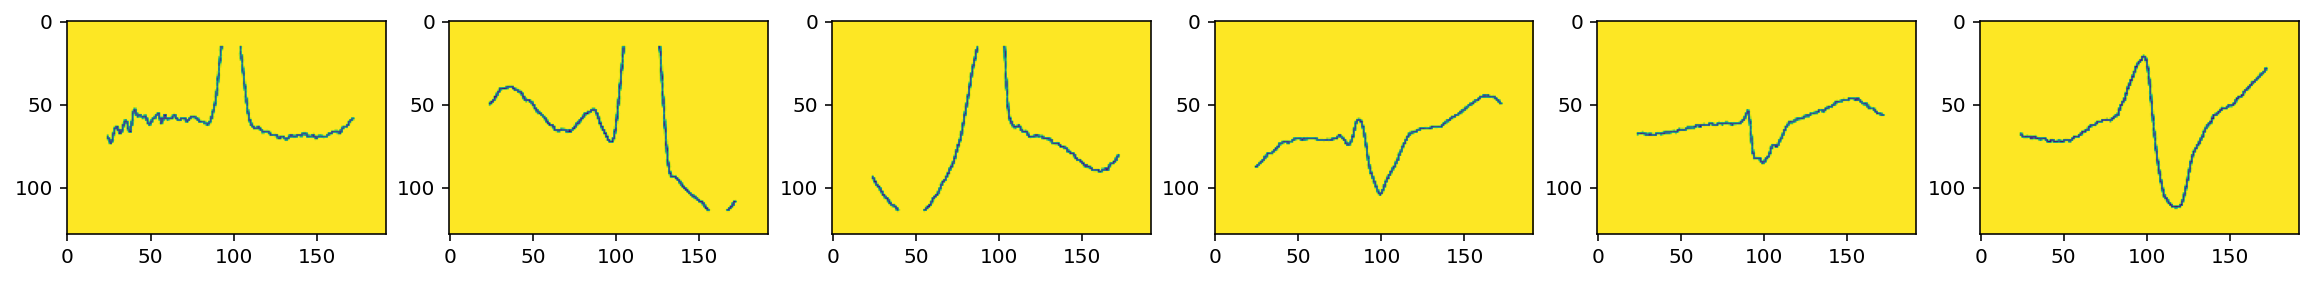

In [22]:
# Examples of V

image_shows(folder = '../input/ecg-images/MITBIH_img/V', number_of_images = 6)

../input/ecg-images/MITBIH_img/F/Ffig_488.png
../input/ecg-images/MITBIH_img/F/Ffig_673.png
../input/ecg-images/MITBIH_img/F/Ffig_255.png
../input/ecg-images/MITBIH_img/F/Ffig_268.png
../input/ecg-images/MITBIH_img/F/Ffig_187.png
../input/ecg-images/MITBIH_img/F/Ffig_70.png


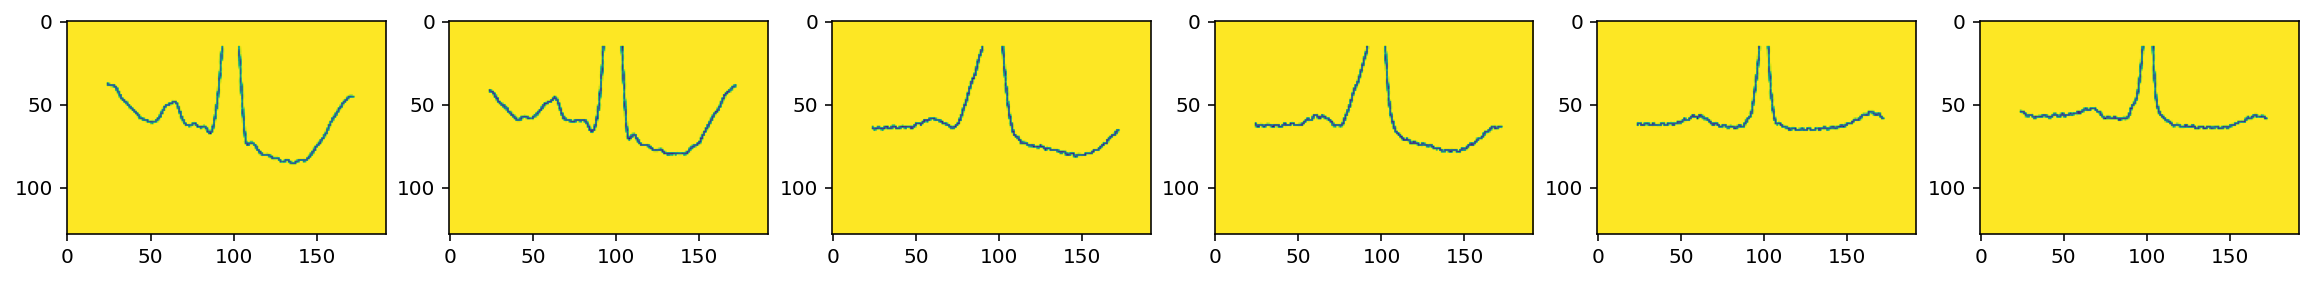

In [23]:
# Examples of F

image_shows(folder = '../input/ecg-images/MITBIH_img/F', number_of_images = 6)

## To see 3 channels I plot figures with cv 2 package

In [24]:
import cv2

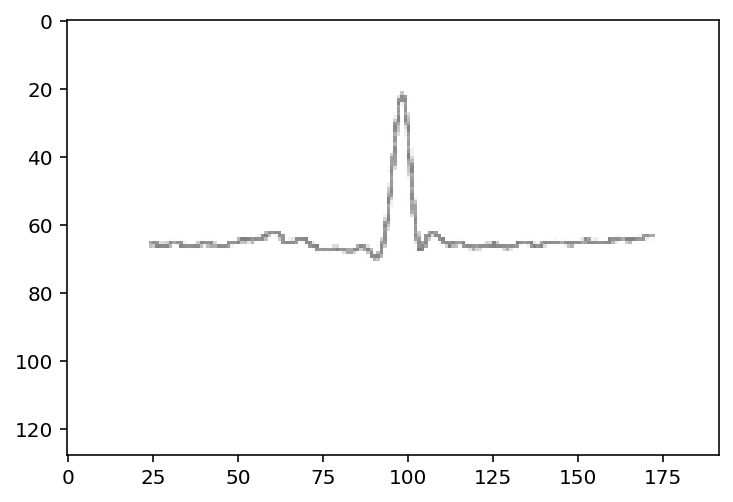

In [25]:
imgcv = cv2.imread(os.path.join('../input/ecg-images/MITBIH_img/N', N_imgs[0]))
plt.imshow(imgcv)
plt.show();

In [26]:
imgcv.shape

(128, 192, 3)

In [27]:
b = imgcv.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = imgcv.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = imgcv.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0

# <span style="color:blue">Plot RGB</span>

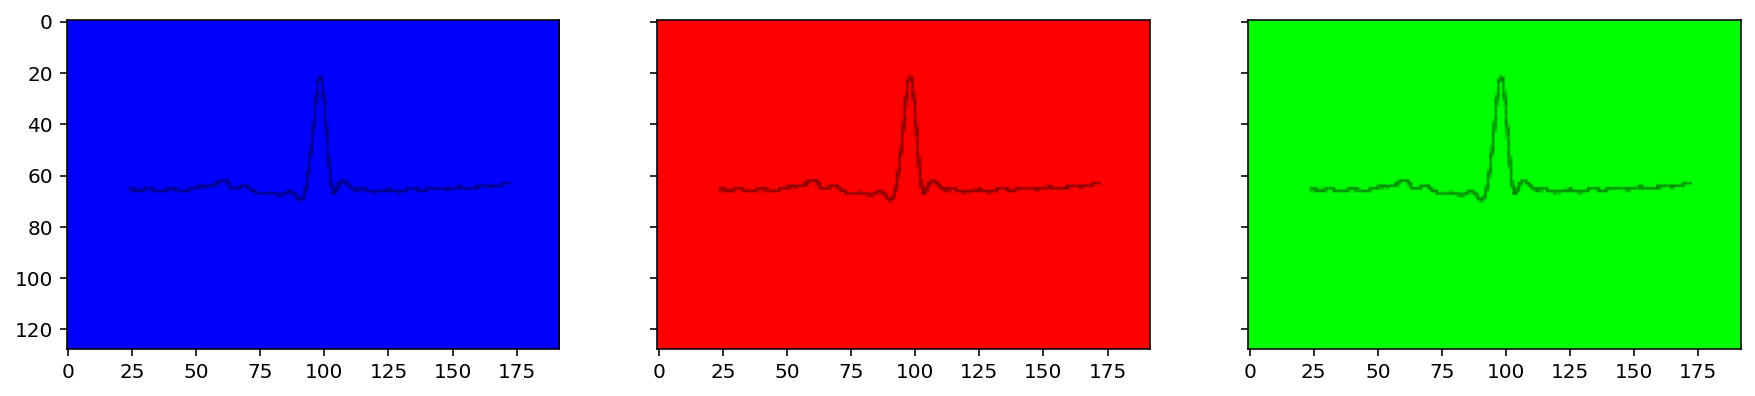

In [28]:
# plot data

fig = plt.figure(figsize=(15,15))

plot_1 = plt.subplot(131)
plot_1.imshow(r);

#plt.subplot(131).imshow(b);

plot_2 = plt.subplot(132, sharex=plot_1, sharey=plot_1)
plt.setp(plot_2.get_yticklabels(), visible=False);
plot_2.imshow(b);

plot_3 = plt.subplot(133, sharex=plot_1, sharey=plot_1)
plt.setp(plot_3.get_yticklabels(), visible=False);
plot_3.imshow(g);

plt.show();

# <span style="color:blue">Split Data in to Test and Train Folders</span>

In [29]:
for root, dirs, files in os.walk('/kaggle/'):
    print(root)

/kaggle/
/kaggle/lib
/kaggle/lib/kaggle
/kaggle/input
/kaggle/input/ecg-images
/kaggle/input/ecg-images/MITBIH_img
/kaggle/input/ecg-images/MITBIH_img/N
/kaggle/input/ecg-images/MITBIH_img/F
/kaggle/input/ecg-images/MITBIH_img/Q
/kaggle/input/ecg-images/MITBIH_img/V
/kaggle/input/ecg-images/MITBIH_img/S
/kaggle/working


## <span style="color:blue">Create Test and Train Folders</span>

In [30]:
os.makedirs('../working/train/N', exist_ok = True)
os.makedirs('../working/train/F', exist_ok = True)
os.makedirs('../working/train/Q', exist_ok = True)
os.makedirs('../working/train/V', exist_ok = True)
os.makedirs('../working/train/S', exist_ok = True)


os.makedirs('../working/test/N', exist_ok = True)
os.makedirs('../working/test/F', exist_ok = True)
os.makedirs('../working/test/Q', exist_ok = True)
os.makedirs('../working/test/V', exist_ok = True)
os.makedirs('../working/test/S', exist_ok = True)

In [31]:
for root, dirs, files in os.walk('/kaggle/'):
    print(root)

/kaggle/
/kaggle/lib
/kaggle/lib/kaggle
/kaggle/input
/kaggle/input/ecg-images
/kaggle/input/ecg-images/MITBIH_img
/kaggle/input/ecg-images/MITBIH_img/N
/kaggle/input/ecg-images/MITBIH_img/F
/kaggle/input/ecg-images/MITBIH_img/Q
/kaggle/input/ecg-images/MITBIH_img/V
/kaggle/input/ecg-images/MITBIH_img/S
/kaggle/working
/kaggle/working/train
/kaggle/working/train/S
/kaggle/working/train/N
/kaggle/working/train/V
/kaggle/working/train/Q
/kaggle/working/train/F
/kaggle/working/test
/kaggle/working/test/S
/kaggle/working/test/N
/kaggle/working/test/V
/kaggle/working/test/Q
/kaggle/working/test/F


## I want to make %20 test set. For this reason I will copy first %20 percent of each class to test folders

## <span style="color:blue">Copy Files</span>

## <span style="color:red">Copy F files</span>

In [32]:
for file_name in F_imgs[0:round(len(F_imgs)/5)]:
    
    full_file_name = os.path.join('../input/ecg-images/MITBIH_img/F', file_name);
    
    if os.path.isfile(full_file_name):
        
        a = shutil.copy(full_file_name, '../working/test/F');
        
        
for file_name in F_imgs[round(len(F_imgs)/5):]:
    
    full_file_name = os.path.join('../input/ecg-images/MITBIH_img/F', file_name);
    
    if os.path.isfile(full_file_name):
        
        a = shutil.copy(full_file_name, '../working/train/F');

print("done")

done


## <span style="color:red">Copy N files</span>

In [33]:
# N_imgs = os.listdir('../input/ecg-images/MITBIH_img/N')

for file_name in N_imgs[0:round(len(N_imgs)/5)]:
    
    full_file_name = os.path.join('../input/ecg-images/MITBIH_img/N', file_name);
    
    if os.path.isfile(full_file_name):
        
        a = shutil.copy(full_file_name, '../working/test/N');
        
for file_name in N_imgs[round(len(N_imgs)/5):]:
    
    full_file_name = os.path.join('../input/ecg-images/MITBIH_img/N', file_name);
    
    if os.path.isfile(full_file_name):
        
        a = shutil.copy(full_file_name, '../working/train/N');

print("done") 

done


## <span style="color:red">Copy V files</span>

In [34]:
for file_name in V_imgs[0:round(len(V_imgs)/5)]:
    
    full_file_name = os.path.join('../input/ecg-images/MITBIH_img/V', file_name);
    
    if os.path.isfile(full_file_name):
        
        a = shutil.copy(full_file_name, '../working/test/V');
        
        
for file_name in V_imgs[round(len(V_imgs)/5):]:
    
    full_file_name = os.path.join('../input/ecg-images/MITBIH_img/V', file_name);
    
    if os.path.isfile(full_file_name):
        
        a = shutil.copy(full_file_name, '../working/train/V');

print("done")

done


## <span style="color:red">Copy Q files</span>

In [35]:
for file_name in Q_imgs[0:round(len(Q_imgs)/5)]:
    
    full_file_name = os.path.join('../input/ecg-images/MITBIH_img/Q', file_name);
    
    if os.path.isfile(full_file_name):
        
        a = shutil.copy(full_file_name, '../working/test/Q');
        
        
for file_name in Q_imgs[round(len(Q_imgs)/5):]:
    
    full_file_name = os.path.join('../input/ecg-images/MITBIH_img/Q', file_name);
    
    if os.path.isfile(full_file_name):
        
        a = shutil.copy(full_file_name, '../working/train/Q');

print("done")

done


## <span style="color:red">Copy S files</span>

In [36]:
S_imgs = os.listdir('../input/ecg-images/MITBIH_img/S')

for file_name in S_imgs[0:round(len(S_imgs)/5)]:
    
    full_file_name = os.path.join('../input/ecg-images/MITBIH_img/S', file_name);
    
    if os.path.isfile(full_file_name):
        
        a = shutil.copy(full_file_name, '../working/test/S');
        
        
for file_name in S_imgs[round(len(S_imgs)/5):]:
    
    full_file_name = os.path.join('../input/ecg-images/MITBIH_img/S', file_name);
    
    if os.path.isfile(full_file_name):
        
        a = shutil.copy(full_file_name, '../working/train/S');

print("done")

done


In [37]:
folder = '/kaggle/working'
list_files(folder)

working - 3
    train - 5
        S - 2223
        N - 72471
        V - 5789
        Q - 6430
        F - 642
    test - 5
        S - 556
        N - 18118
        V - 1447
        Q - 1608
        F - 161


## <span style="color:blue">Check Total File Numbers in each Train and Test Folders </span>

In [38]:
N_imgs       = len(os.listdir('../input/ecg-images/MITBIH_img/N'))
N_train_imgs = len(os.listdir('../working/train/N'))
N_test_imgs  = len(os.listdir('../working/test/N'))
print('number of N images at the original file: ', N_imgs)
print('total number of train and test picts:    ', N_train_imgs + N_test_imgs)

number of N images at the original file:  90589
total number of train and test picts:     90589


In [39]:
S_imgs       = len(os.listdir('../input/ecg-images/MITBIH_img/S'))
S_train_imgs = len(os.listdir('../working/train/S'))
S_test_imgs  = len(os.listdir('../working/test/S'))
print('number of S images at the original file: ', S_imgs)
print('total number of train and test picts:    ', S_train_imgs + S_test_imgs)

number of S images at the original file:  2779
total number of train and test picts:     2779


In [40]:
F_imgs       = len(os.listdir('../input/ecg-images/MITBIH_img/F'))
F_train_imgs = len(os.listdir('../working/train/F'))
F_test_imgs  = len(os.listdir('../working/test/F'))
print('number of F images at the original file: ', F_imgs)
print('total number of train and test picts:    ', F_train_imgs + F_test_imgs)

number of F images at the original file:  803
total number of train and test picts:     803


In [41]:
V_imgs       = len(os.listdir('../input/ecg-images/MITBIH_img/V'))
V_train_imgs = len(os.listdir('../working/train/V'))
V_test_imgs  = len(os.listdir('../working/test/V'))
print('number of V images at the original file: ', V_imgs)
print('total number of train and test picts:    ', V_train_imgs + V_test_imgs)

number of V images at the original file:  7236
total number of train and test picts:     7236


In [42]:
Q_imgs       = len(os.listdir('../input/ecg-images/MITBIH_img/Q'))
Q_train_imgs = len(os.listdir('../working/train/Q'))
Q_test_imgs  = len(os.listdir('../working/test/Q'))
print('number of Q images at the original file: ', Q_imgs)
print('total number of train and test picts:    ', Q_train_imgs + Q_test_imgs)

number of Q images at the original file:  8038
total number of train and test picts:     8038


Lets load images with datasets.ImageFolder function and than read and plot

## <span style="color:blue">Set Data Loader</span>

In [43]:
# Define default PATH

TRAIN_PATH        = '../working/train'

transform         = transforms.Compose(
                                       [transforms.Resize([120,120]),
                                        transforms.Grayscale(), 
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5), (0.5))
                                       ])
  
train_data_set    = datasets.ImageFolder(root=TRAIN_PATH, transform=transform)

batch_size=32

train_data_loader = DataLoader(train_data_set, batch_size=batch_size, shuffle=True)

In [44]:
TEST_PATH        = '../working/test'
  
test_data_set    = datasets.ImageFolder(root=TEST_PATH, transform=transform)

test_data_loader = DataLoader(test_data_set, batch_size=batch_size, shuffle=True)

In [45]:
# Run this to test your data loader

images, labels = next(iter(train_data_loader))

In [46]:
print(type(images))

print(images.size())

print("")
print("Batch Size:   ",images.size()[0])
print("Channel Size: ",images.size()[1])
print("Image Height: ",images.size()[2])
print("Image Width:  ",images.size()[3])

<class 'torch.Tensor'>
torch.Size([32, 1, 120, 120])

Batch Size:    32
Channel Size:  1
Image Height:  120
Image Width:   120


The batch size is 32, image size is reduced to 120*120 and we need only one channel(Gray Scale).

In [47]:
def imshow_tensor(image, ax=None, title=None, normalize=True):
    
    """Imshow for Tensor."""
    
    if ax is None:
        fig, ax = plt.subplots()
        
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.5])
        std = np.array([0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

## <span style="color:blue">Plot one Batch of Files from Dataloader</span>

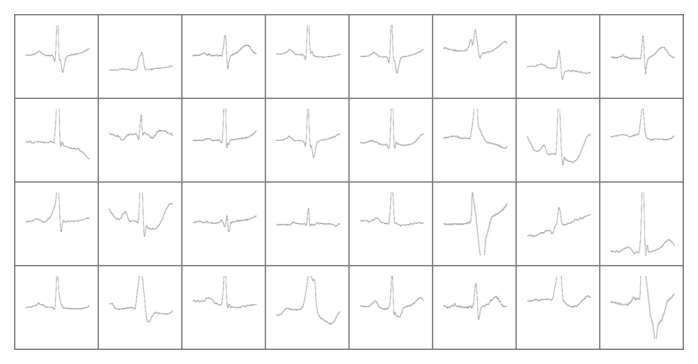

In [48]:
# show images

ncol = 8;

imshow_tensor(torchvision.utils.make_grid(images,nrow = ncol));

In [49]:
# print labels

classes = ('N', 'Q', 'F', 'S', 'V')

nrow = batch_size/ncol;

for row in range(int(nrow)):
    
    print(' '.join('%5s' % classes[labels[(row*ncol)+j]] for j in range(ncol))) 

    Q     Q     Q     Q     Q     Q     Q     Q
    Q     Q     Q     Q     Q     Q     Q     Q
    Q     Q     Q     Q     Q     F     Q     Q
    Q     Q     Q     V     Q     Q     Q     F


# <span style="color:blue">Building Convolutional Neural Networks</span> 

## <span style="color:red">First CNN Model</span>

In [50]:
# CNN Architect

class ConvNet_1(nn.Module):
    
    def __init__(self):
        
        super(ConvNet_1, self).__init__()

        self.layer_1  = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        
        self.relu1    = nn.ReLU(inplace=True)
        
        self.maxpool1 = MaxPool2d(kernel_size=2)
        

        self.layer_2  = nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, stride=1, padding=1)
        
        self.relu2    = nn.ReLU(inplace=True)
        
        self.maxpool2 = MaxPool2d(kernel_size=2)
        
        self.drop_out = nn.Dropout()
        
        
        # out_channels = 4, number of classes = 5
        
        # image width = 120, image height = 120 after two maxpooling 120 -> 60 -> 30
        
        self.fc1 = nn.Linear(4 * 30 * 30, 5)
        
    # Defining the forward pass

    def forward(self, x):
        
        out = self.layer_1(x)
        
        out = self.relu1(out)
        
        out = self.maxpool1(out)
        
        
        out = self.layer_2(out)
        
        out = self.relu2(out)
        
        out = self.maxpool2(out)
        
        
        out = out.reshape(out.size(0), -1)
        
        out = self.drop_out(out)
        
        out = self.fc1(out)
        
        return out
    
# Define Model

model_1 = ConvNet_1()

print(model_1)

ConvNet_1(
  (layer_1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU(inplace=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer_2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU(inplace=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=3600, out_features=5, bias=True)
)


In [51]:
# Define Criterion

criterion = nn.CrossEntropyLoss()

# Define Optimizer

optimizer = optim.SGD(model_1.parameters(), lr=0.001, momentum=0.9)

## <span style="color:red">Chech and run GPU</span>

In [52]:
# Whether to train on a gpu and Number of gpus

if cuda.is_available(): 
    
    print(f'{cuda.device_count()} number of gpus are detected and available.')
    
else:
        
    print(f'Train on gpu is not available')
        
        

1 number of gpus are detected and available.


## <span style="color:red">Train Our First Model</span>

Model is started training on 1 number of gpus.
Devise is cuda
Epoch [1/1], Step [300/2737], Loss: 0.7720, Accuracy: 78.12%
Epoch [1/1], Step [600/2737], Loss: 0.5599, Accuracy: 84.38%
Epoch [1/1], Step [900/2737], Loss: 0.6174, Accuracy: 84.38%
Epoch [1/1], Step [1200/2737], Loss: 0.4534, Accuracy: 93.75%
Epoch [1/1], Step [1500/2737], Loss: 0.2319, Accuracy: 93.75%
Epoch [1/1], Step [1800/2737], Loss: 0.2355, Accuracy: 93.75%
Epoch [1/1], Step [2100/2737], Loss: 0.2232, Accuracy: 96.88%
Epoch [1/1], Step [2400/2737], Loss: 0.2371, Accuracy: 87.50%
Epoch [1/1], Step [2700/2737], Loss: 0.0422, Accuracy: 100.00%
tensor([[72132,  4260,  2187,  4045,   593],
        [   60,  2121,     2,    72,     0],
        [    9,     0,    29,     5,     0],
        [  261,    48,     5,  1666,    48],
        [    9,     1,     0,     1,     1]], device='cuda:0',
       dtype=torch.int32)
Finished Training


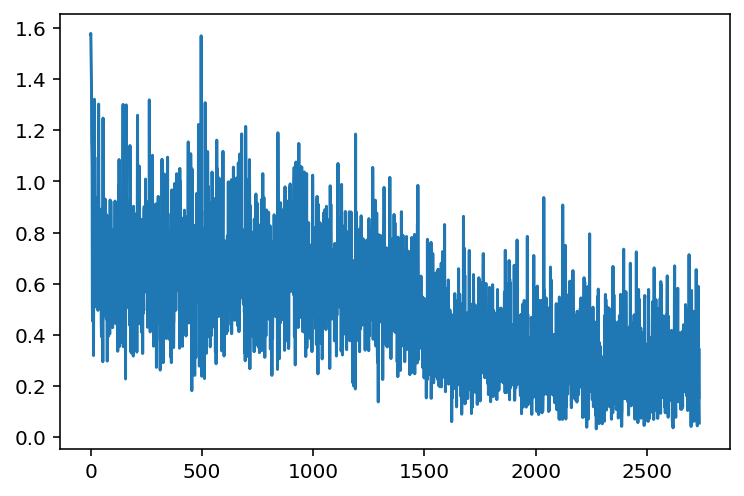

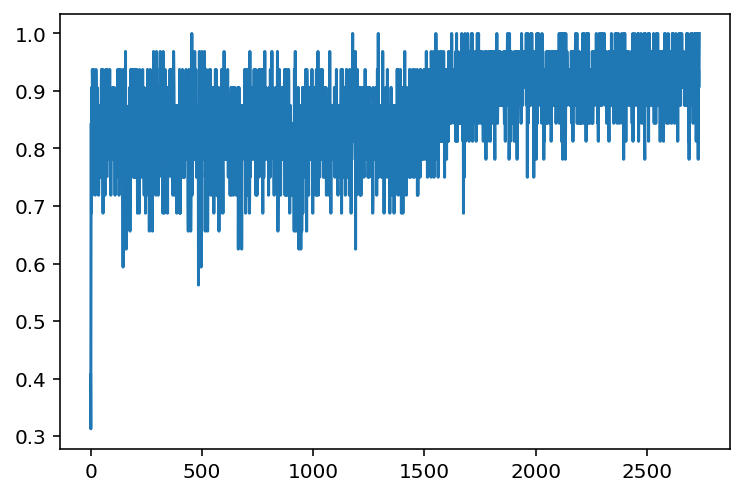

In [53]:
# This part is working

# Train the model

if torch.cuda.is_available():
    
    MODEL = model_1.cuda()
    CRITERION = criterion.cuda()
    print(f'Model is started training on {cuda.device_count()} number of gpus.')
    print("Devise is cuda")
    
else:
    
    MODEL = model_1
    CRITERION = criterion
    print("Devise is cpu and model is started training.")

total_step = len(train_data_loader)
loss_list = []
acc_list = []

num_epochs = 1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

all_con_mat = torch.zeros([num_epochs, 5, 5], dtype=torch.int32, device=device)

for epoch in range(num_epochs):
    
    # define empty tensor 5*5 beginning of every epoch
    # tensor [row,column]
    con_mat = torch.zeros([5, 5], dtype=torch.int32, device=device)
    
    for i, data in enumerate(train_data_loader):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # optimization
        optimizer.zero_grad()
        
        # Forward to get output
        outputs = MODEL(inputs)
        # Calculate Loss
        loss = CRITERION(outputs, labels)
        # Backward propagation
        loss.backward()
        # Updating parameters
        optimizer.step()
        
        # Store loss
        loss_list.append(loss.item())
    
        # Calculate labels size
        total = labels.size(0)
        
        # Outputs.data has dimension batch size * 5
        # torch.max returns the max value of elements(_) and their indices(predicted) in the tensor array
        _, predicted = torch.max(outputs.data, 1)
        
        # Calculate total number of correct labels 
        correct = (predicted == labels).sum().item()
        
        # Store accuracy
        acc_list.append(correct / total)
        
        
        # Build Confusion Matrix
        for element in range(total):
            
            # con_mat[row,column]
            # con_mat[predictions, actual]
            
            con_mat[predicted[element].item()-1][labels[element].item()-1] += 1

        if (i + 1) % 300 == 0:                             # every 300 mini-batches...
            
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
    print(con_mat)
            
    all_con_mat[epoch] = con_mat            
            
print('Finished Training')

plt.plot(loss_list);
plt.show();

plt.plot(acc_list);
plt.show();

In [54]:
# SUM FOR EACH COLUMN

# N Q S V F

print(torch.sum(con_mat, dim=0))

tensor([72471,  6430,  2223,  5789,   642], device='cuda:0')


In [55]:
folder = '/kaggle/working'
list_files(folder)

working - 3
    train - 5
        S - 2223
        N - 72471
        V - 5789
        Q - 6430
        F - 642
    test - 5
        S - 556
        N - 18118
        V - 1447
        Q - 1608
        F - 161


## <span style="color:red">Recall, Precision, and F1 Score for each Class</span>

In [56]:
# RECALL

# PRECISION

# F1-score = 2 × (precision × recall)/(precision + recall)

class_list = ['N', 'Q', 'S', 'V', 'F']

f1_score_list=[0,0,0,0,0]

precision_list=[0,0,0,0,0]

recall_list=[0,0,0,0,0]

delta = 0.0000000000001

for i in range(torch.sum(con_mat, dim=0).size(0)): 
    
    recall_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=0)[i].item()+delta)
    
    precision_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=1)[i].item()+delta)
    
    f1_score_list[i] = 2 * precision_list[i]*recall_list[i]/(precision_list[i]+recall_list[i]+delta)
    
    print('class: {:<2},total number of class: {:>5}, Correctly predicted: {:>5}, Recall: {:.2f}%, Precision: {:.2f}%, F1-Score: {:.2f}%'
          
                  .format(class_list[i],
                          torch.sum(con_mat, dim=0)[i].item(),
                          con_mat[i][i].item(), 
                          recall_list[i],
                          precision_list[i],
                          f1_score_list[i]
                         ))

class: N ,total number of class: 72471, Correctly predicted: 72132, Recall: 1.00%, Precision: 0.87%, F1-Score: 0.93%
class: Q ,total number of class:  6430, Correctly predicted:  2121, Recall: 0.33%, Precision: 0.94%, F1-Score: 0.49%
class: S ,total number of class:  2223, Correctly predicted:    29, Recall: 0.01%, Precision: 0.67%, F1-Score: 0.03%
class: V ,total number of class:  5789, Correctly predicted:  1666, Recall: 0.29%, Precision: 0.82%, F1-Score: 0.43%
class: F ,total number of class:   642, Correctly predicted:     1, Recall: 0.00%, Precision: 0.08%, F1-Score: 0.00%


## <span style="color:red">Train Our First Model epoch=5</span>

cuda
Epoch [1/5], Step [300/2737], Loss: 0.5224, Accuracy: 87.50%
Epoch [1/5], Step [600/2737], Loss: 0.3160, Accuracy: 90.62%
Epoch [1/5], Step [900/2737], Loss: 0.4693, Accuracy: 87.50%
Epoch [1/5], Step [1200/2737], Loss: 0.2986, Accuracy: 90.62%
Epoch [1/5], Step [1500/2737], Loss: 0.1861, Accuracy: 93.75%
Epoch [1/5], Step [1800/2737], Loss: 0.2577, Accuracy: 93.75%
Epoch [1/5], Step [2100/2737], Loss: 0.2728, Accuracy: 93.75%
Epoch [1/5], Step [2400/2737], Loss: 0.2184, Accuracy: 93.75%
Epoch [1/5], Step [2700/2737], Loss: 0.2438, Accuracy: 93.75%
tensor([[71701,   715,  1823,  1381,   445],
        [  157,  5575,     5,   181,     1],
        [  128,     1,   364,    21,     1],
        [  459,   136,    31,  4179,   119],
        [   26,     3,     0,    27,    76]], device='cuda:0',
       dtype=torch.int32)
class name: N, total number of class: 72471, Correctly predicted: 71701, Recall: 0.99%, Precision: 0.94%, F1-Score: 0.97%
class name: Q, total number of class:  6430, Corr

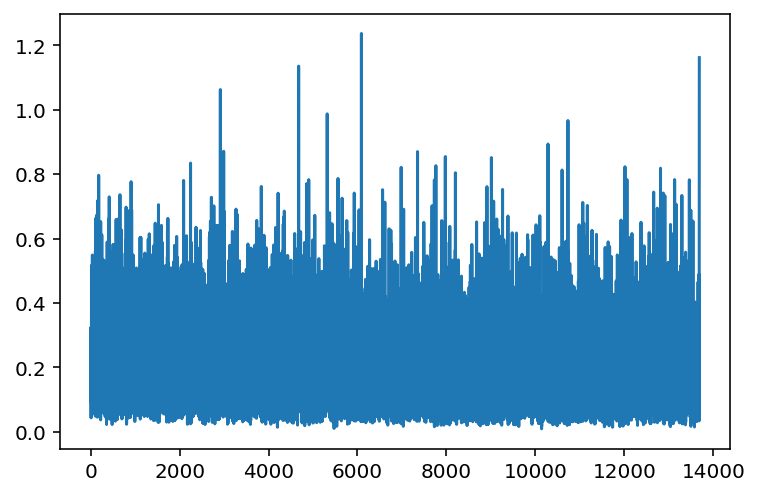

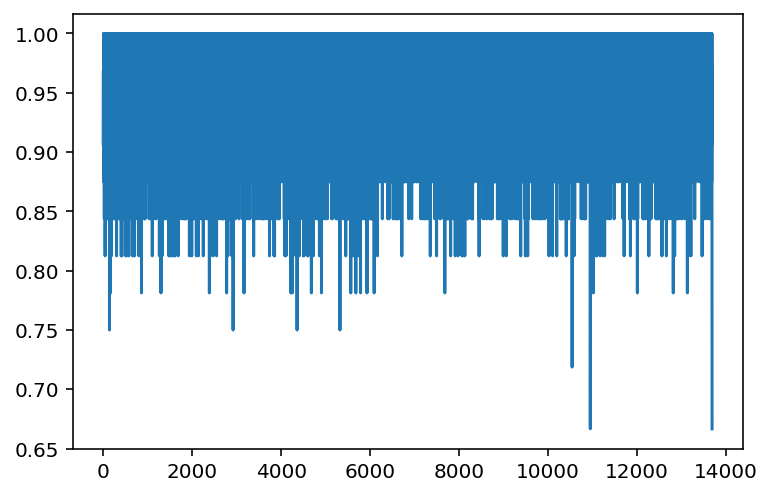

In [57]:
# This part is working

if torch.cuda.is_available():
    
    MODEL = model_1.cuda()
    CRITERION = criterion.cuda()
    print("cuda")
    
else:
    
    MODEL = model_1
    CRITERION = criterion
    print("cpu")

# Train the model

total_step = len(train_data_loader)
loss_list = []
acc_list = []

num_epochs = 5

class_list = ['N', 'Q', 'S', 'V', 'F']

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

all_con_mat = torch.zeros([num_epochs, 5, 5], dtype=torch.int32, device=device)

for epoch in range(num_epochs):
    
    f1_score_list=[0,0,0,0,0]

    precision_list=[0,0,0,0,0]

    recall_list=[0,0,0,0,0]
    
    delta = 0.0000000000001 
    
    # define empty tensor 5*5 beginning of every epoch
    # tensor [row,column]
    con_mat = torch.zeros([5, 5], dtype=torch.int32, device=device)
    
    for i, data in enumerate(train_data_loader):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # optimization
        optimizer.zero_grad()
        
        # Forward to get output
        outputs = MODEL(inputs)
        # Calculate Loss
        loss = CRITERION(outputs, labels)
        # Backward propagation
        loss.backward()
        # Updating parameters
        optimizer.step()
        
        # Store loss
        loss_list.append(loss.item())
    
        # Calculate labels size
        total = labels.size(0)
        
        # Outputs.data has dimension batch size * 5
        # torch.max returns the max value of elements(_) and their indices(predicted) in the tensor array
        _, predicted = torch.max(outputs.data, 1)
        
        # Calculate total number of correct labels 
        correct = (predicted == labels).sum().item()
        
        # Store accuracy
        acc_list.append(correct / total)
        
        for element in range(total):
            
            # con_mat[row,column]
            # con_mat[predictions, actual]
            con_mat[predicted[element].item()-1][labels[element].item()-1] += 1

        if (i + 1) % 300 == 0:                             # every 300 mini-batches...
            
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
    print(con_mat)
            
    all_con_mat[epoch] = con_mat
    
    # Print Confusion Matrix
    
    for i in range(torch.sum(con_mat, dim=0).size(0)): 
    
        recall_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=0)[i].item()+delta)
    
        precision_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=1)[i].item()+delta)
    
        f1_score_list[i] = 2 * precision_list[i]*recall_list[i]/(precision_list[i]+recall_list[i]+delta)
        
    
        print('class name: {}, total number of class: {:>5}, Correctly predicted: {:>5}, Recall: {:.2f}%, Precision: {:.2f}%, F1-Score: {:.2f}%'
          
                  .format(class_list[i],
                          torch.sum(con_mat, dim=0)[i].item(),
                          con_mat[i][i].item(), 
                          recall_list[i],
                          precision_list[i],
                          f1_score_list[i]
                         ))
    
            
print('Finished Training')

plt.plot(loss_list);
plt.show();

plt.plot(acc_list);
plt.show();

In [58]:
all_con_mat

tensor([[[71701,   715,  1823,  1381,   445],
         [  157,  5575,     5,   181,     1],
         [  128,     1,   364,    21,     1],
         [  459,   136,    31,  4179,   119],
         [   26,     3,     0,    27,    76]],

        [[71670,   626,  1645,  1251,   403],
         [  150,  5672,     5,   155,     4],
         [  180,     3,   538,    23,     0],
         [  450,   118,    34,  4316,   108],
         [   21,    11,     1,    44,   127]],

        [[71656,   584,  1610,  1189,   395],
         [  163,  5723,     8,   118,     5],
         [  208,     3,   577,    33,     0],
         [  419,   113,    28,  4408,    91],
         [   25,     7,     0,    41,   151]],

        [[71644,   568,  1549,  1059,   375],
         [  147,  5745,     2,   131,     3],
         [  231,     1,   646,    42,     1],
         [  414,   114,    26,  4516,    88],
         [   35,     2,     0,    41,   175]],

        [[71650,   546,  1451,  1042,   373],
         [  150,  5781,   

## <span style="color:red">Check Trained 1. Model on the Test Data</span>

In [59]:
confusion_mat = torch.zeros([5, 5], dtype=torch.int32, device=device)

with torch.no_grad():
    
    for data in test_data_loader:
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = MODEL(inputs)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total = labels.size(0)
        
        # Calculate total number of correct labels 
        correct = (predicted == labels).sum().item()
        
        for element in range(total):
            
            # confusion_mat[row,column]
            # confusion_mat[predictions, actual]
            confusion_mat[predicted[element].item()-1][labels[element].item()-1] += 1

    print(confusion_mat)

tensor([[17959,   127,   381,   299,    96],
        [   26,  1467,     0,    43,     1],
        [   49,     0,   169,     5,     0],
        [   80,    14,     6,  1093,    33],
        [    4,     0,     0,     7,    31]], device='cuda:0',
       dtype=torch.int32)


In [60]:
class_list = ['N', 'Q', 'S', 'V', 'F']

f1_score_list=[0,0,0,0,0]

precision_list=[0,0,0,0,0]

recall_list=[0,0,0,0,0]
    
delta = 0.0000000000001 


for i in range(torch.sum(confusion_mat, dim=0).size(0)): 
    
        recall_list[i] = confusion_mat[i][i].item()/(torch.sum(confusion_mat, dim=0)[i].item()+delta)
    
        precision_list[i] = confusion_mat[i][i].item()/(torch.sum(confusion_mat, dim=1)[i].item()+delta)
    
        f1_score_list[i] = 2 * precision_list[i]*recall_list[i]/(precision_list[i]+recall_list[i]+delta)
        
    
        print('class name: {}, total number of class: {:>5}, Correctly predicted: {:>5}, Recall: {:.2f}%, Precision: {:.2f}%, F1-Score: {:.2f}%'
          
                  .format(class_list[i],
                          torch.sum(confusion_mat, dim=0)[i].item(),
                          confusion_mat[i][i].item(), 
                          recall_list[i],
                          precision_list[i],
                          f1_score_list[i]
                         ))
    

class name: N, total number of class: 18118, Correctly predicted: 17959, Recall: 0.99%, Precision: 0.95%, F1-Score: 0.97%
class name: Q, total number of class:  1608, Correctly predicted:  1467, Recall: 0.91%, Precision: 0.95%, F1-Score: 0.93%
class name: S, total number of class:   556, Correctly predicted:   169, Recall: 0.30%, Precision: 0.76%, F1-Score: 0.43%
class name: V, total number of class:  1447, Correctly predicted:  1093, Recall: 0.76%, Precision: 0.89%, F1-Score: 0.82%
class name: F, total number of class:   161, Correctly predicted:    31, Recall: 0.19%, Precision: 0.74%, F1-Score: 0.31%


## <span style="color:red">Built and Train Second CNN Model</span>

In [61]:
# CNN Architect

class ConvNet_2(nn.Module):
    
    def __init__(self):
        
        super(ConvNet_2, self).__init__()

        self.layer_1  = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        
        self.relu1    = nn.ReLU(inplace=True)
        
        self.maxpool1 = MaxPool2d(kernel_size=2)
        

        self.layer_2  = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1)
        
        self.relu2    = nn.ReLU(inplace=True)
        
        self.maxpool2 = MaxPool2d(kernel_size=2)
        
        self.drop_out = nn.Dropout()
        
        
        # out_channels = 8, number of classes = 5
        
        # image width = 120, image height = 120 after two maxpooling 120 -> 60 -> 30
        
        self.fc1 = nn.Linear(8 * 30 * 30, 5)
        
    # Defining the forward pass

    def forward(self, x):
        
        out = self.layer_1(x)
        
        out = self.relu1(out)
        
        out = self.maxpool1(out)
        
        
        out = self.layer_2(out)
        
        out = self.relu2(out)
        
        out = self.maxpool2(out)
        
        
        out = out.reshape(out.size(0), -1)
        
        out = self.drop_out(out)
        
        out = self.fc1(out)
        
        return out
    
# Define Model

model_2 = ConvNet_2()

print(model_2)

ConvNet_2(
  (layer_1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU(inplace=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer_2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU(inplace=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=7200, out_features=5, bias=True)
)


cuda
Epoch [1/5], Step [300/2737], Loss: 1.5520, Accuracy: 31.25%
Epoch [1/5], Step [600/2737], Loss: 1.5766, Accuracy: 31.25%
Epoch [1/5], Step [900/2737], Loss: 1.5525, Accuracy: 28.12%
Epoch [1/5], Step [1200/2737], Loss: 1.5616, Accuracy: 34.38%
Epoch [1/5], Step [1500/2737], Loss: 1.5919, Accuracy: 18.75%
Epoch [1/5], Step [1800/2737], Loss: 1.5827, Accuracy: 18.75%
Epoch [1/5], Step [2100/2737], Loss: 1.5710, Accuracy: 28.12%
Epoch [1/5], Step [2400/2737], Loss: 1.5810, Accuracy: 12.50%
Epoch [1/5], Step [2700/2737], Loss: 1.5544, Accuracy: 28.12%
tensor([[20422,  1805,   620,  1684,   164],
        [19314,  1696,   600,  1572,   185],
        [16909,  1525,   502,  1291,   155],
        [15600,  1392,   499,  1225,   138],
        [  226,    12,     2,    17,     0]], device='cuda:0',
       dtype=torch.int32)
class name: N, total number of class: 72471, Correctly predicted: 20422, Recall: 0.28%, Precision: 0.83%, F1-Score: 0.42%
class name: Q, total number of class:  6430, Corr

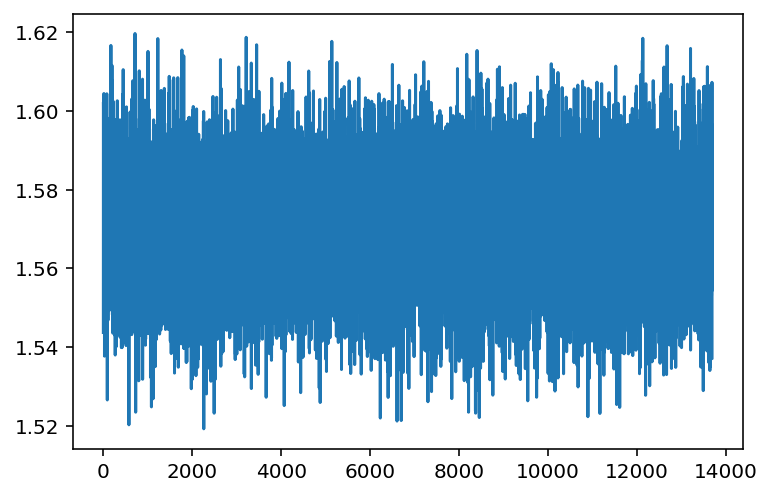

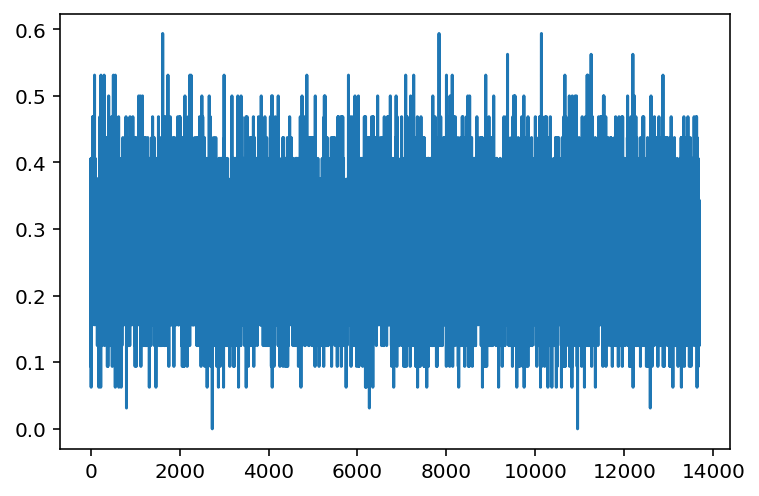

In [62]:
if torch.cuda.is_available():
    
    MODEL = model_2.cuda()
    CRITERION = criterion.cuda()
    print("cuda")
    
else:
    
    MODEL = model_2
    CRITERION = criterion
    print("cpu")

# Train the model

total_step = len(train_data_loader)
loss_list = []
acc_list = []

num_epochs = 5

class_list = ['N', 'Q', 'S', 'V', 'F']

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

all_con_mat = torch.zeros([num_epochs, 5, 5], dtype=torch.int32, device=device)

for epoch in range(num_epochs):
    
    f1_score_list=[0,0,0,0,0]

    precision_list=[0,0,0,0,0]

    recall_list=[0,0,0,0,0]
    
    delta = 0.0000000000001 
    
    # define empty tensor 5*5 beginning of every epoch
    # tensor [row,column]
    con_mat = torch.zeros([5, 5], dtype=torch.int32, device=device)
    
    for i, data in enumerate(train_data_loader):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # optimization
        optimizer.zero_grad()
        
        # Forward to get output
        outputs = MODEL(inputs)
        # Calculate Loss
        loss = CRITERION(outputs, labels)
        # Backward propagation
        loss.backward()
        # Updating parameters
        optimizer.step()
        
        # Store loss
        loss_list.append(loss.item())
    
        # Calculate labels size
        total = labels.size(0)
        
        # Outputs.data has dimension batch size * 5
        # torch.max returns the max value of elements(_) and their indices(predicted) in the tensor array
        _, predicted = torch.max(outputs.data, 1)
        
        # Calculate total number of correct labels 
        correct = (predicted == labels).sum().item()
        
        # Store accuracy
        acc_list.append(correct / total)
        
        for element in range(total):
            
            # con_mat[row,column]
            # con_mat[predictions, actual]
            con_mat[predicted[element].item()-1][labels[element].item()-1] += 1

        if (i + 1) % 300 == 0:                             # every 300 mini-batches...
            
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
    print(con_mat)
            
    all_con_mat[epoch] = con_mat
    
    # Print Confusion Matrix
    
    for i in range(torch.sum(con_mat, dim=0).size(0)): 
    
        recall_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=0)[i].item()+delta)
    
        precision_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=1)[i].item()+delta)
    
        f1_score_list[i] = 2 * precision_list[i]*recall_list[i]/(precision_list[i]+recall_list[i]+delta)
        
    
        print('class name: {}, total number of class: {:>5}, Correctly predicted: {:>5}, Recall: {:.2f}%, Precision: {:.2f}%, F1-Score: {:.2f}%'
          
                  .format(class_list[i],
                          torch.sum(con_mat, dim=0)[i].item(),
                          con_mat[i][i].item(), 
                          recall_list[i],
                          precision_list[i],
                          f1_score_list[i]
                         ))
    
            
print('Finished Training')

plt.plot(loss_list);
plt.show();

plt.plot(acc_list);
plt.show();

## <span style="color:red">Built and Train Third CNN Model</span>

In [63]:
# CNN Architect

class ConvNet_3(nn.Module):
    
    def __init__(self):
        
        super(ConvNet_3, self).__init__()

        self.conv1    = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        
        self.relu1    = nn.ReLU(inplace=True)
        
        self.pool1    = MaxPool2d(kernel_size=2)
        

        self.conv2    = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1)
        
        self.lrelu2   = nn.LeakyReLU(0.1)
        
        self.bn2      = nn.BatchNorm2d(8)
        
        self.pool2    = MaxPool2d(kernel_size=2)
        
        self.dropout2 = nn.Dropout(p=0.25)
        
        
        # out_channels = 8, number of classes = 5
        
        # image width = 120, image height = 120 after two maxpooling 120 -> 60 -> 30
        
        self.fc3      = nn.Linear(8 * 30 * 30, 100)
        
        self.relu3    = nn.ReLU(inplace=True)
        
        self.dropout3 = nn.Dropout(p=0.5)
        
        self.fc4 = nn.Linear(100, 5)
        
    # Defining the forward pass

    def forward(self, x):
        
        out = self.conv1(x)
        
        out = self.relu1(out)
        
        out = self.pool1(out)
        
        
        
        out = self.conv2(out)
        
        out = self.lrelu2(out)
        
        out = self.bn2(out)
        
        out = self.pool2(out)
        
        out = self.dropout2(out)
        
        
        out = out.reshape(out.size(0), -1)
        
        
        out = self.fc3(out)
        
        out = self.relu3(out)
        
        out = self.dropout3(out)
        
        out = self.fc4(out)
        
        return out
    
# Define Model

model_3 = ConvNet_3()

print(model_3)

ConvNet_3(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU(inplace=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (lrelu2): LeakyReLU(negative_slope=0.1)
  (bn2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.25, inplace=False)
  (fc3): Linear(in_features=7200, out_features=100, bias=True)
  (relu3): ReLU(inplace=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc4): Linear(in_features=100, out_features=5, bias=True)
)


cuda
Epoch [1/5], Step [300/2737], Loss: 2.1106, Accuracy: 15.62%
Epoch [1/5], Step [600/2737], Loss: 2.1924, Accuracy: 6.25%
Epoch [1/5], Step [900/2737], Loss: 2.0976, Accuracy: 3.12%
Epoch [1/5], Step [1200/2737], Loss: 2.1305, Accuracy: 0.00%
Epoch [1/5], Step [1500/2737], Loss: 2.1350, Accuracy: 0.00%
Epoch [1/5], Step [1800/2737], Loss: 2.0028, Accuracy: 9.38%
Epoch [1/5], Step [2100/2737], Loss: 1.9390, Accuracy: 9.38%
Epoch [1/5], Step [2400/2737], Loss: 2.0351, Accuracy: 3.12%
Epoch [1/5], Step [2700/2737], Loss: 2.0130, Accuracy: 9.38%
tensor([[  585,    57,    28,    67,     6],
        [24938,  2302,   752,  2211,   209],
        [ 2107,   146,    56,   167,    21],
        [26664,  2568,   833,  2046,   271],
        [18177,  1357,   554,  1298,   135]], device='cuda:0',
       dtype=torch.int32)
class name: N, total number of class: 18118, Correctly predicted: 17959, Recall: 0.01%, Precision: 0.79%, F1-Score: 0.02%
class name: Q, total number of class:  1608, Correctly pr

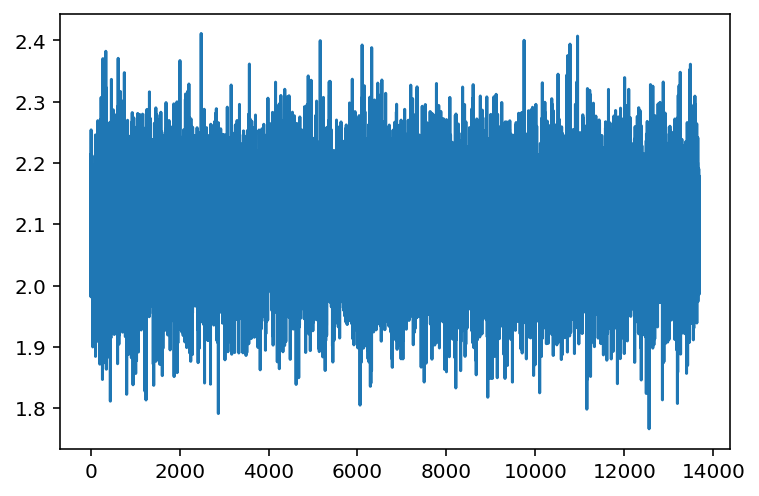

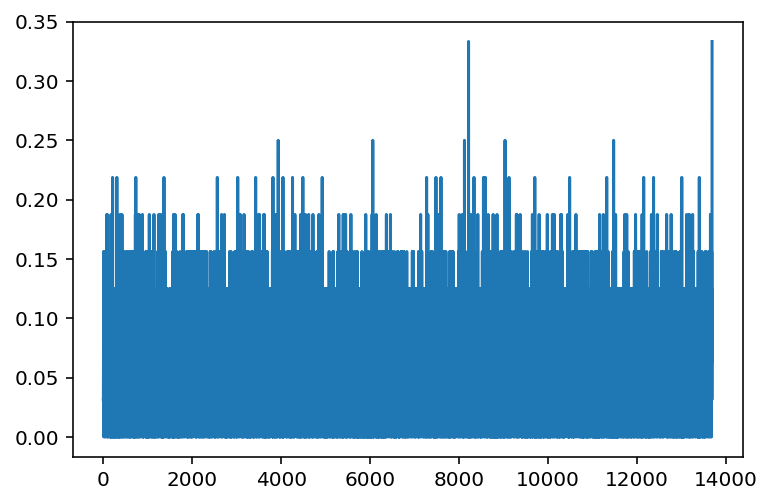

In [64]:
if torch.cuda.is_available():
    
    MODEL = model_3.cuda()
    CRITERION = criterion.cuda()
    print("cuda")
    
else:
    
    MODEL = model_3
    CRITERION = criterion
    print("cpu")

# Train the model

total_step = len(train_data_loader)
loss_list = []
acc_list = []

num_epochs = 5

class_list = ['N', 'Q', 'S', 'V', 'F']

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

all_con_mat = torch.zeros([num_epochs, 5, 5], dtype=torch.int32, device=device)

for epoch in range(num_epochs):
    
    f1_score_list=[0,0,0,0,0]

    precision_list=[0,0,0,0,0]

    recall_list=[0,0,0,0,0]
    
    delta = 0.0000000000001 
    
    # define empty tensor 5*5 beginning of every epoch
    # tensor [row,column]
    con_mat = torch.zeros([5, 5], dtype=torch.int32, device=device)
    
    for i, data in enumerate(train_data_loader):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # optimization
        optimizer.zero_grad()
        
        # Forward to get output
        outputs = MODEL(inputs)
        # Calculate Loss
        loss = CRITERION(outputs, labels)
        # Backward propagation
        loss.backward()
        # Updating parameters
        optimizer.step()
        
        # Store loss
        loss_list.append(loss.item())
    
        # Calculate labels size
        total = labels.size(0)
        
        # Outputs.data has dimension batch size * 5
        # torch.max returns the max value of elements(_) and their indices(predicted) in the tensor array
        _, predicted = torch.max(outputs.data, 1)
        
        # Calculate total number of correct labels 
        correct = (predicted == labels).sum().item()
        
        # Store accuracy
        acc_list.append(correct / total)
        
        for element in range(total):
            
            # con_mat[row,column]
            # con_mat[predictions, actual]
            con_mat[predicted[element].item()-1][labels[element].item()-1] += 1

        if (i + 1) % 300 == 0:                             # every 300 mini-batches...
            
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
    print(con_mat)
            
    all_con_mat[epoch] = con_mat
    
    # Print Confusion Matrix
    
    for i in range(torch.sum(con_mat, dim=0).size(0)): 
    
        recall_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=0)[i].item()+delta)
    
        precision_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=1)[i].item()+delta)
    
        f1_score_list[i] = 2 * precision_list[i]*recall_list[i]/(precision_list[i]+recall_list[i]+delta)
        
    
        print('class name: {}, total number of class: {:>5}, Correctly predicted: {:>5}, Recall: {:.2f}%, Precision: {:.2f}%, F1-Score: {:.2f}%'
          
                  .format(class_list[i],
                          torch.sum(confusion_mat, dim=0)[i].item(),
                          confusion_mat[i][i].item(), 
                          recall_list[i],
                          precision_list[i],
                          f1_score_list[i]
                         ))
    
            
print('Finished Training')

plt.plot(loss_list);
plt.show();

plt.plot(acc_list);
plt.show();

## <span style="color:red">Built and Train Forth CNN Model</span>

In [67]:
# CNN Architect

class ConvNet_4(nn.Module):
    
    def __init__(self):
        
        super(ConvNet_4, self).__init__()

        self.layer_1  = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        
        self.relu1    = nn.ReLU(inplace=True)
        
        self.maxpool1 = MaxPool2d(kernel_size=2)
        

        self.layer_2  = nn.Conv2d(in_channels=4, out_channels=4, kernel_size=5, stride=1, padding=2)
        
        self.relu2    = nn.ReLU(inplace=True)
        
        self.maxpool2 = MaxPool2d(kernel_size=2)
        
        self.drop_out = nn.Dropout()
        
        
        # out_channels = 4, number of classes = 5
        
        # image width = 120, image height = 120 after two maxpooling 120 -> 60 -> 30
        
        self.fc1 = nn.Linear(4 * 30 * 30, 5)
        
    # Defining the forward pass

    def forward(self, x):
        
        out = self.layer_1(x)
        
        out = self.relu1(out)
        
        out = self.maxpool1(out)
        
        
        out = self.layer_2(out)
        
        out = self.relu2(out)
        
        out = self.maxpool2(out)
        
        out = self.drop_out(out)
        
        
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        
        return out

# Define Model

model_4 = ConvNet_4()

print(model_4)

ConvNet_4(
  (layer_1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU(inplace=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer_2): Conv2d(4, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU(inplace=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=3600, out_features=5, bias=True)
)


cuda
Epoch [1/5], Step [300/2737], Loss: 1.5882, Accuracy: 31.25%
Epoch [1/5], Step [600/2737], Loss: 1.6097, Accuracy: 25.00%
Epoch [1/5], Step [900/2737], Loss: 1.5855, Accuracy: 43.75%
Epoch [1/5], Step [1200/2737], Loss: 1.5680, Accuracy: 59.38%
Epoch [1/5], Step [1500/2737], Loss: 1.5949, Accuracy: 25.00%
Epoch [1/5], Step [1800/2737], Loss: 1.5849, Accuracy: 31.25%
Epoch [1/5], Step [2100/2737], Loss: 1.5865, Accuracy: 21.88%
Epoch [1/5], Step [2400/2737], Loss: 1.6012, Accuracy: 25.00%
Epoch [1/5], Step [2700/2737], Loss: 1.5737, Accuracy: 43.75%
tensor([[27548,  2394,   816,  2118,   236],
        [ 4102,   356,   122,   319,    34],
        [ 5753,   466,   201,   466,    54],
        [11363,  1077,   327,  1057,   111],
        [23705,  2137,   757,  1829,   207]], device='cuda:0',
       dtype=torch.int32)
class name: N, total number of class: 18118, Correctly predicted: 17959, Recall: 0.38%, Precision: 0.83%, F1-Score: 0.52%
class name: Q, total number of class:  1608, Corr

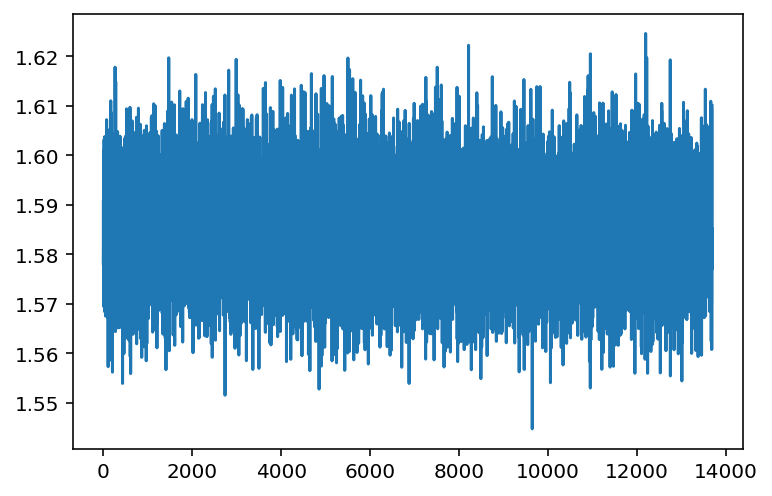

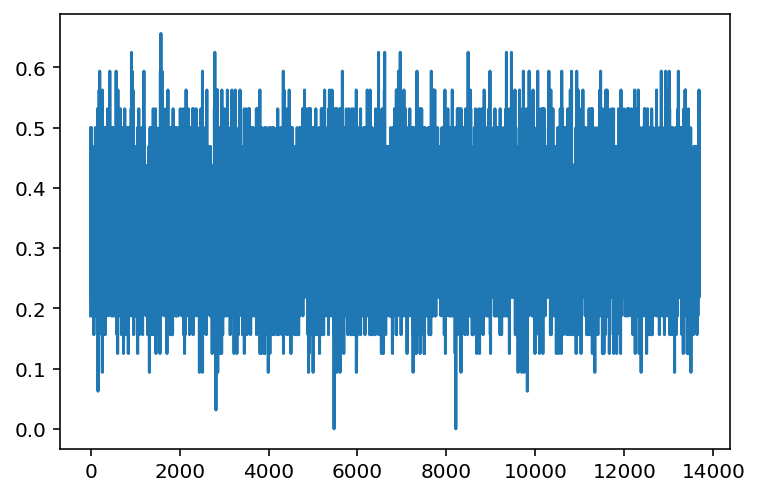

In [68]:
if torch.cuda.is_available():
    
    MODEL = model_4.cuda()
    CRITERION = criterion.cuda()
    print("cuda")
    
else:
    
    MODEL = model_4
    CRITERION = criterion
    print("cpu")

# Train the model

total_step = len(train_data_loader)
loss_list = []
acc_list = []

num_epochs = 5

class_list = ['N', 'Q', 'S', 'V', 'F']

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

all_con_mat = torch.zeros([num_epochs, 5, 5], dtype=torch.int32, device=device)

for epoch in range(num_epochs):
    
    f1_score_list=[0,0,0,0,0]

    precision_list=[0,0,0,0,0]

    recall_list=[0,0,0,0,0]
    
    delta = 0.0000000000001 
    
    # define empty tensor 5*5 beginning of every epoch
    # tensor [row,column]
    con_mat = torch.zeros([5, 5], dtype=torch.int32, device=device)
    
    for i, data in enumerate(train_data_loader):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # optimization
        optimizer.zero_grad()
        
        # Forward to get output
        outputs = MODEL(inputs)
        # Calculate Loss
        loss = CRITERION(outputs, labels)
        # Backward propagation
        loss.backward()
        # Updating parameters
        optimizer.step()
        
        # Store loss
        loss_list.append(loss.item())
    
        # Calculate labels size
        total = labels.size(0)
        
        # Outputs.data has dimension batch size * 5
        # torch.max returns the max value of elements(_) and their indices(predicted) in the tensor array
        _, predicted = torch.max(outputs.data, 1)
        
        # Calculate total number of correct labels 
        correct = (predicted == labels).sum().item()
        
        # Store accuracy
        acc_list.append(correct / total)
        
        for element in range(total):
            
            # con_mat[row,column]
            # con_mat[predictions, actual]
            con_mat[predicted[element].item()-1][labels[element].item()-1] += 1

        if (i + 1) % 300 == 0:                             # every 300 mini-batches...
            
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
    print(con_mat)
            
    all_con_mat[epoch] = con_mat
    
    # Print Confusion Matrix
    
    for i in range(torch.sum(con_mat, dim=0).size(0)): 
    
        recall_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=0)[i].item()+delta)
    
        precision_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=1)[i].item()+delta)
    
        f1_score_list[i] = 2 * precision_list[i]*recall_list[i]/(precision_list[i]+recall_list[i]+delta)
        
    
        print('class name: {}, total number of class: {:>5}, Correctly predicted: {:>5}, Recall: {:.2f}%, Precision: {:.2f}%, F1-Score: {:.2f}%'
          
                  .format(class_list[i],
                          torch.sum(confusion_mat, dim=0)[i].item(),
                          confusion_mat[i][i].item(), 
                          recall_list[i],
                          precision_list[i],
                          f1_score_list[i]
                         ))
    
            
print('Finished Training')

plt.plot(loss_list);
plt.show();

plt.plot(acc_list);
plt.show();

## <span style="color:red">Check Trained Forth Model on the Test Data</span>

In [69]:
confusion_mat = torch.zeros([5, 5], dtype=torch.int32, device=device)

with torch.no_grad():
    
    for data in test_data_loader:
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = MODEL(inputs)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total = labels.size(0)
        
        # Calculate total number of correct labels 
        correct = (predicted == labels).sum().item()
        
        for element in range(total):
            
            # confusion_mat[row,column]
            # confusion_mat[predictions, actual]
            confusion_mat[predicted[element].item()-1][labels[element].item()-1] += 1

    print(confusion_mat)

tensor([[6892,  595,  224,  510,   43],
        [1060,   69,   30,   70,   10],
        [1463,  124,   52,  113,    7],
        [2803,  304,   71,  263,   43],
        [5900,  516,  179,  491,   58]], device='cuda:0', dtype=torch.int32)


In [70]:
class_list = ['N', 'Q', 'S', 'V', 'F']

f1_score_list=[0,0,0,0,0]

precision_list=[0,0,0,0,0]

recall_list=[0,0,0,0,0]
    
delta = 0.0000000000001 


for i in range(torch.sum(confusion_mat, dim=0).size(0)): 
    
        recall_list[i] = confusion_mat[i][i].item()/(torch.sum(confusion_mat, dim=0)[i].item()+delta)
    
        precision_list[i] = confusion_mat[i][i].item()/(torch.sum(confusion_mat, dim=1)[i].item()+delta)
    
        f1_score_list[i] = 2 * precision_list[i]*recall_list[i]/(precision_list[i]+recall_list[i]+delta)
        
    
        print('class name: {}, total number of class: {:>5}, Correctly predicted: {:>5}, Recall: {:.2f}%, Precision: {:.2f}%, F1-Score: {:.2f}%'
          
                  .format(class_list[i],
                          torch.sum(confusion_mat, dim=0)[i].item(),
                          confusion_mat[i][i].item(), 
                          recall_list[i],
                          precision_list[i],
                          f1_score_list[i]
                         ))

class name: N, total number of class: 18118, Correctly predicted:  6892, Recall: 0.38%, Precision: 0.83%, F1-Score: 0.52%
class name: Q, total number of class:  1608, Correctly predicted:    69, Recall: 0.04%, Precision: 0.06%, F1-Score: 0.05%
class name: S, total number of class:   556, Correctly predicted:    52, Recall: 0.09%, Precision: 0.03%, F1-Score: 0.04%
class name: V, total number of class:  1447, Correctly predicted:   263, Recall: 0.18%, Precision: 0.08%, F1-Score: 0.11%
class name: F, total number of class:   161, Correctly predicted:    58, Recall: 0.36%, Precision: 0.01%, F1-Score: 0.02%
